In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
import scipy.stats as stats
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
import joblib
import pickle

In [2]:
data = pd.read_csv("E:\\Dibyendu\Projects\\1. Machine Learning Projects\\Heart Disease Project-1\\Prepared_data\\Heart Disease.csv")

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0.0,1.0,1
1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0.0,2.0,1
2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0.0,2.0,1
3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0.0,2.0,1
4,57,0,0,120.0,354.0,0,1,163.0,1,0.6,2,0.0,2.0,1


In [3]:
X = data.drop('target', axis=1)
Y = data['target']

In [4]:
x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size= 0.25, random_state = 355)

logistic = LogisticRegression()
logistic.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [5]:
y_predict = logistic.predict(x_train)

print("Based On trian Data\n\n")
print("Confusion_matrix: \n",confusion_matrix(y_train, y_predict), '\n')
print("Accuracy_score: ", accuracy_score(y_train, y_predict), '\n')
print("classification_report: \n\n", classification_report(y_train, y_predict))

Based On trian Data


Confusion_matrix: 
 [[ 82  24]
 [  9 112]] 

Accuracy_score:  0.8546255506607929 

classification_report: 

               precision    recall  f1-score   support

           0       0.90      0.77      0.83       106
           1       0.82      0.93      0.87       121

    accuracy                           0.85       227
   macro avg       0.86      0.85      0.85       227
weighted avg       0.86      0.85      0.85       227



0.8496023701855606

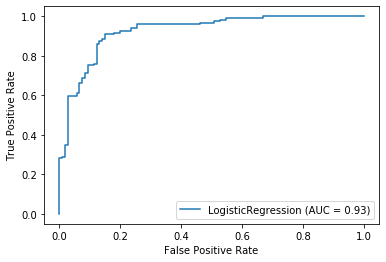

In [6]:
metrics.plot_roc_curve(logistic, x_train, y_train)
metrics.roc_auc_score(y_train, y_predict, average=None)

In [7]:
y_predict1 = logistic.predict(x_test)

print("Based On test Data\n\n")
print("Confusion_matrix: \n",confusion_matrix(y_test, y_predict1), '\n')
print("Accuracy_score: ", accuracy_score(y_test,y_predict1), '\n')
print("classification_report: \n\n", classification_report(y_test,y_predict1))

Based On test Data


Confusion_matrix: 
 [[26  6]
 [ 5 39]] 

Accuracy_score:  0.8552631578947368 

classification_report: 

               precision    recall  f1-score   support

           0       0.84      0.81      0.83        32
           1       0.87      0.89      0.88        44

    accuracy                           0.86        76
   macro avg       0.85      0.85      0.85        76
weighted avg       0.85      0.86      0.85        76



0.8494318181818181

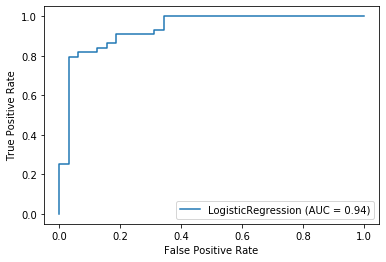

In [8]:
metrics.plot_roc_curve(logistic, x_test, y_test)
metrics.roc_auc_score(y_test, y_predict1, average=None)

In [9]:
crossVal = cross_val_score(logistic, X, Y, cv=100)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

In [10]:
print(crossVal, '\n\n')
print("Accuracy Score: ", crossVal.mean())

[1.         1.         0.75       0.66666667 0.66666667 1.
 1.         1.         1.         0.66666667 0.66666667 1.
 1.         1.         0.66666667 1.         0.66666667 0.66666667
 1.         1.         0.66666667 0.33333333 1.         1.
 1.         0.66666667 0.33333333 1.         0.66666667 1.
 1.         0.66666667 0.66666667 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         0.66666667
 0.66666667 1.         0.66666667 1.         1.         1.
 0.66666667 1.         1.         1.         1.         1.
 0.33333333 1.         0.66666667 1.         1.         1.
 1.         1.         1.         0.66666667 1.         1.
 0.66666667 0.66666667 0.66666667 0.66666667 1.         0.66666667
 0.66666667 0.66666667 1.         1.         1.         1.
 1.         0.33333333 1.         0.33333333 1.         0.33333333
 0.66666667 0.66666667 0.66666667 0.66666667 1.         0.66666667
 0.66666667 1.  

# Here using Logistic Regression, 

for train data:--
    
    accuracy score is: 85% (***)
    precision is:  86%
    recall is: 85%
        
        
for test data:--
    
    accuracy score is: 85% (***)
    precision is:  85%
    recall is: 85%
        
        
# Therefore we can say that my Model is a Generalized Model (low bias and low variance)

In [16]:
# Model Dumping


# joblib.dump(logistic, "E:\\Dibyendu\Projects\\1. Machine Learning Projects\\Heart Disease Project-1\\Models_save\\logistic.pickle")


filename = 'E:\\Dibyendu\Projects\\1. Machine Learning Projects\\Heart Disease Project-1\\Models_save\\logistic.pickle'
pickle.dump(logistic, open(filename, 'wb'))

